<a href="https://colab.research.google.com/github/Chongphob-Sr/Deploy-Module/blob/main/ForecastingCar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle

In [35]:
# Load data
#from google.colab import drive
#drive.mount('/content/drive')

df = pd.read_csv("car_saless.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'car_saless.csv'

In [29]:
# Display the loaded DataFrame to verify

print(df.head())

   Year  Electric_Vehicles  Combustion_Cars
0  2010               1000            50000
1  2011               1500            52000
2  2012               2000            54000
3  2013               3000            55000
4  2014               5000            56000


Year                 int64
Electric_Vehicles    int64
Combustion_Cars      int64
dtype: object

In [11]:
# Ensure the data is in the correct format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set 'Year' as index if not already
df.set_index('Year', inplace=True)

# Display first few rows to verify
print(df.head())

            Combustion_Cars  Electric_Vehicles
Year                                          
2010-01-01            50000               1000
2011-01-01            52000               1500
2012-01-01            54000               2000
2013-01-01            55000               3000
2014-01-01            56000               5000


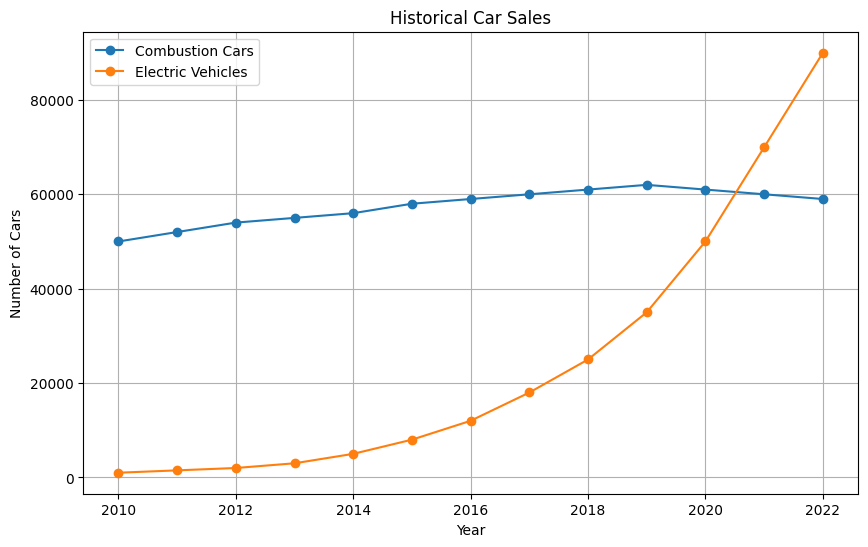

In [12]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Combustion_Cars'], label='Combustion Cars', marker='o')
plt.plot(df.index, df['Electric_Vehicles'], label='Electric Vehicles', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Historical Car Sales')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptt9whrax/l0ml5rc_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptt9whrax/555z3uw3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9100', 'data', 'file=/tmp/tmptt9whrax/l0ml5rc_.json', 'init=/tmp/tmptt9whrax/555z3uw3.json', 'output', 'file=/tmp/tmptt9whrax/prophet_modelm4hm5bq2/prophet_model-20240622193855.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:38:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

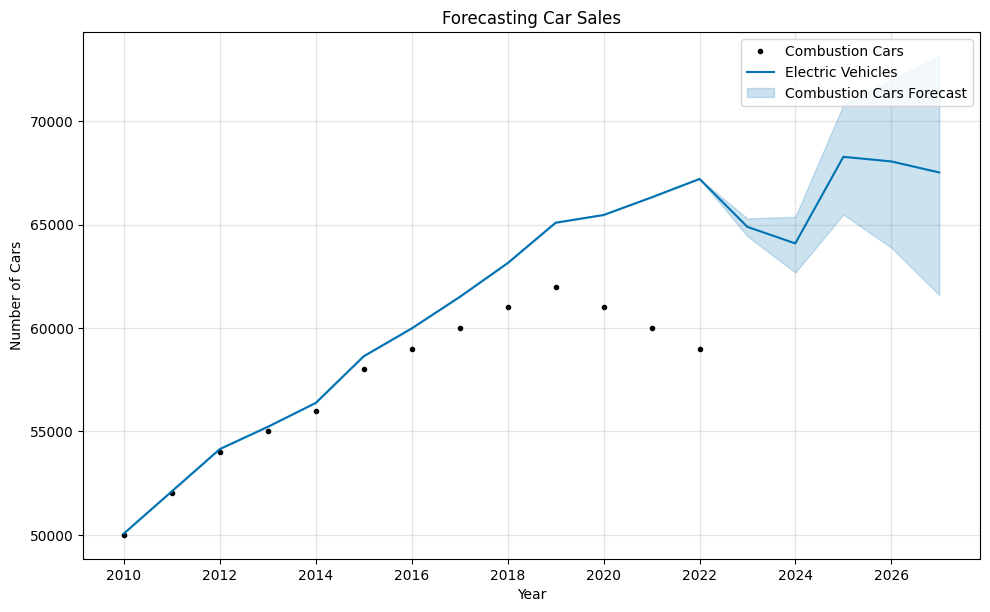

In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming df is already loaded and prepared as you described earlier

# Prepare data for Prophet (requires 'ds' and 'y' columns)
df_prophet = df.reset_index().rename(columns={'Year': 'ds', 'Combustion_Cars': 'y'})

# Initialize Prophet model
model = Prophet(seasonality_mode='multiplicative')

# Add additional regressor for Electric Vehicles
df_prophet['Electric_Vehicles'] = df['Electric_Vehicles'].values
model.add_regressor('Electric_Vehicles')

# Fit the model
model.fit(df_prophet)

# Make future dataframe for 5 years
future = model.make_future_dataframe(periods=5, freq='Y')

# Ensure 'Electric_Vehicles' values align with 'future' dataframe length
# Example assuming 'Electric_Vehicles' are extrapolated or forecasted for future years
# Replace this with your actual method of forecasting Electric Vehicles for future years
future['Electric_Vehicles'] = [forecasted_value for forecasted_value in range(len(future))]

# Forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Forecasting Car Sales')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(['Combustion Cars', 'Electric Vehicles', 'Combustion Cars Forecast', 'Electric Vehicles Forecast'])
plt.grid(True)
plt.show()


In [31]:
pip install joblib

In [32]:
import joblib

# Assuming 'model' is your trained machine learning model
trained_model = model  # Replace with your actual model object

# Specify the file path where you want to save the model
model_filename = 'trained_model.pkl'

# Save the model to disk using joblib
joblib.dump(trained_model, model_filename)


['trained_model.pkl']

In [33]:
import joblib
from sklearn.linear_model import LinearRegression
import numpy as np

# Example: Train a linear regression model
X_train = np.array([[1, 1], [2, 2], [3, 3]])
y_train = np.array([1, 2, 3])

model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model
model_filename = 'trained_linear_regression_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to trained_linear_regression_model.pkl


In [34]:
import joblib

# Load the saved model
model_filename = 'trained_model.pkl'
loaded_model = joblib.load(model_filename)

# Use the loaded model for predictions, evaluation, etc.
